In [1]:
import torch
from data_loader import *
from model import *
from trainer import *
from tqdm import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [108]:
dataset = recSysDataset(max_len=20, root = "data\\kcore_5_collated.txt")
train_data = train_val_test_split(dataset, split=(.5,.45,.05), mode = "train")
val_data = train_val_test_split(dataset, split=(.5,.45,.05), mode = "val")
test_data = train_val_test_split(dataset, split=(.5,.45,.05), mode = "test")
dataloader = torch.utils.data.DataLoader(train_data, batch_size = 16, shuffle = True)
tqdm.write("Dataloader done")
model = recSysNet("cpu",1569974,20,20,1,.1,bidirectional=False)
tqdm.write("Model instantiated")
trainer = Trainer(model, BPRLoss, [], Adam(model.parameters(),lr=.001), dataloader)
tqdm.write("Training...")
trainer.train()

3035045it [00:24, 125202.97it/s]


Dataloader done
Model instantiated
Training...
Inside loop


  0%|          | 0/136136 [00:00<?, ?it/s]

Inside loop


KeyboardInterrupt: 

In [54]:
torch.tensor([0]).sigmoid().log()

tensor([-0.6931])

torch.Size([4, 4, 4])

In [86]:
c = torch.randint(0,3,(4,4))
c.unsqueeze(2).size()

torch.Size([4, 4, 1])

In [72]:
g = torch.arange(0,40).reshape((10,4))
g.unsqueeze(2).size()

torch.Size([10, 4, 1])

In [87]:
torch.gather(b,2,c.unsqueeze(2)).size()

torch.Size([4, 4, 1])

In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
from trainer import BPRLoss

a = torch.rand((8,8,10))
b = torch.randint(9,(8,8))
c = b
BPRLoss(a,b,c)
# torch.gather(a[:,1:-1,:],2,b[:,1:-1].unsqueeze(2)).size()

torch.Size([8, 6, 1])


tensor(33.2711)

In [104]:
from tqdm import tqdm

for i in tqdm(range(1000)):
    ...

100%|██████████| 1000/1000 [00:00<00:00, 999595.81it/s]


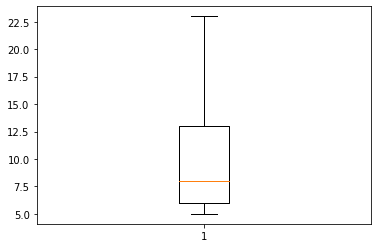

In [21]:
import matplotlib.pyplot as plt
with open("./data/kcore_5_collated.txt", 'r') as f:
    idx_to_item = f.readline().strip().split(",")
    item_to_idx = {v:i for i, v in enumerate(idx_to_item)}
    counter = []
    # self.allitems = set() testing purposes
    for l in f:
        splitt = l.split(",")
        counter.append(len(splitt))
 
    plt.boxplot(counter,showfliers=False)        
    plt.show()
        